In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 14})

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

def running_avg(x):
    return np.cumsum(x) / np.arange(1, x.size + 1)

def running_timeavg(t,x):
    dt = t[1:] - t[:-1]
    x = np.cumsum(x[:-1] * dt)
    y = t[1:]
    return [a/b for a,b in zip(x,y)]

/home/ulysses/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Caso servicio en DC

In [2]:
#row = vec.iloc[0]
#delay_dc = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})

#for i in range(1,len(vec)):
#    row = vec.iloc[i]
#    row = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})
#    mean_delay_dc = pd.concat((mean_delay_dc, row))
#mean_delay_dc = mean_delay_dc.groupby(level=0).mean()

In [3]:
# Cargamos los datos
targetDcDelay = pd.read_csv("targetDcDelay.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Filtramos end-to-end delay +  eliminamos los NaN
vec = targetDcDelay[(targetDcDelay.name == 'roundTripTime:vector') & (targetDcDelay.type == "vector")].sort_values(["module"])
vec["vecvalue"] = vec["vecvalue"].apply(lambda x: x * 1000)

data = []
for i in range(0,len(vec)):
    row = vec.iloc[i]
    data.append([np.mean(row.vecvalue), np.std(row.vecvalue), np.min(row.vecvalue), np.max(row.vecvalue)])

#data
usersDcDelay = pd.DataFrame(data, columns = ["avg", "stddev", "min", "max"])
usersDcDelay

,avg,stddev,min,max
0,408.527945,588.140939,184.346353,3189.236140
1,394.791204,462.960610,184.346146,2194.328548
2,292.414857,301.543881,184.345907,1199.801791
3,319.116028,401.907191,184.346923,3191.387643
4,394.855228,561.460658,184.345938,4189.821370
5,419.221060,698.441884,184.346405,4191.611608
6,336.494655,463.947981,184.346242,3191.449363
7,364.271267,481.870424,184.346790,3189.945690
8,380.971488,595.215215,184.345690,4191.192636
9,326.978097,369.338598,184.346632,2193.050713


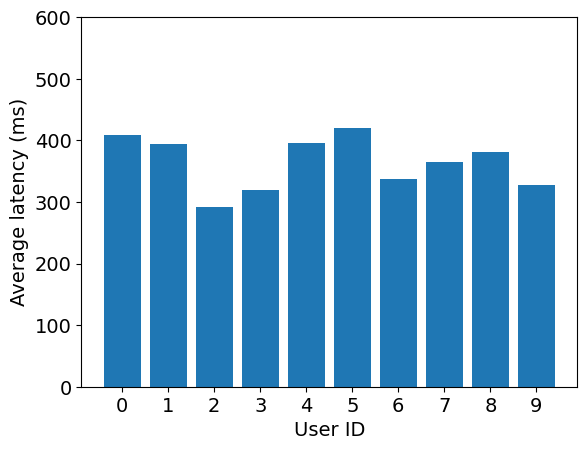

In [4]:
plt.ylabel("Average latency (ms)")
plt.xlabel("User ID")
plt.bar(usersDcDelay.index, usersDcDelay.avg) #drawstyle='steps-post')
ax = plt.gca()
ax.set_xticks(range(0,10))
ax.set_ylim([0,600])
fig = plt.gcf()
fig.savefig("mediumDelaysDc.pdf")
#plt.show()

# Caso servicio en Fog

In [5]:
# Cargamos los datos
targetFogDelay = pd.read_csv("targetFogDelay.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Filtramos end-to-end delay +  eliminamos los NaN
vec = targetFogDelay[(targetFogDelay.name == 'roundTripTime:vector') & (targetFogDelay.type == "vector")].sort_values(["module"])
vec["vecvalue"] = vec["vecvalue"].apply(lambda x: x * 1000)

data = []
for i in range(0,len(vec)):
    row = vec.iloc[i]
    data.append([np.mean(row.vecvalue), np.std(row.vecvalue), np.min(row.vecvalue), np.max(row.vecvalue)])

#data
usersFogDelay = pd.DataFrame(data, columns = ["avg", "stddev", "min", "max"])
usersFogDelay

,avg,stddev,min,max
0,115.195014,219.685865,64.344510,1064.347352
1,81.306423,129.079430,64.344552,1064.346635
2,64.348569,0.026472,64.344540,64.634773
3,98.244565,180.967392,64.344468,1064.347608
4,106.722230,201.437846,64.344375,1064.347639
5,72.835184,91.665182,64.344607,1064.345202
6,98.244338,180.967392,64.344535,1064.346701
7,98.549878,181.709133,64.344476,1064.347396
8,81.697830,187.519102,64.344450,2110.026230
9,89.769805,157.408367,64.344545,1064.347143


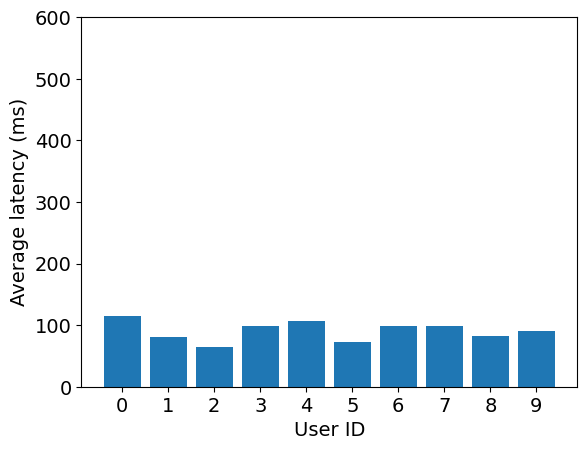

In [6]:
plt.ylabel("Average latency (ms)")
plt.xlabel("User ID")
plt.bar(usersFogDelay.index, usersFogDelay.avg) #drawstyle='steps-post')
ax = plt.gca()
ax.set_xticks(range(0,10))
ax.set_ylim([0,600])
fig = plt.gcf()
fig.savefig("mediumDelaysFog.pdf")

# Comparativa Dc vs Fog

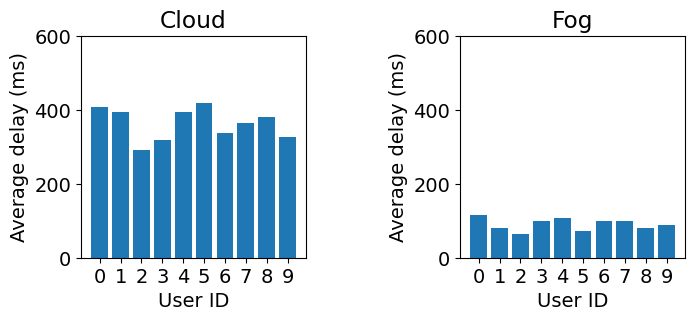

In [7]:
fig, (ax) = plt.subplots(1, 2, figsize=(4,3))
#fig.suptitle('Latencia servicio-cliente por usuario')

fig.tight_layout()
fig.set_size_inches(8, 3)
#plt.ylabel("Latencia promedio (ms)")
#plt.xlabel("Id usuario")
ax[0].set_title("Cloud")
ax[1].set_title("Fog")

ax[0].bar(usersDcDelay.index, usersDcDelay.avg) #drawstyle='steps-post')
ax[1].bar(usersFogDelay.index, usersFogDelay.avg)

for x in ax:
    x.set_ylim(0,600)
    x.set_xticks(range(0,10))
    x.set(xlabel='User ID', ylabel='Average delay (ms)')

#fig.savefig("mediumDelays.pdf", bbox_inches='tight')

# Estadísticas comparativas

In [8]:
usersDcDelay.describe()

,avg,stddev,min,max
count,10.000000,10.000000,10.000000,10.000000
mean,363.764183,492.482738,184.346303,3092.182550
std,42.799227,119.492465,0.000399,991.952944
min,292.414857,301.543881,184.345690,1199.801791
25%,329.357236,417.170545,184.345990,2443.055446
50%,372.621377,472.909202,184.346298,3190.666667
75%,394.839222,581.470869,184.346575,3940.228368
max,419.221060,698.441884,184.346923,4191.611608


In [9]:
usersFogDelay.describe()

,avg,stddev,min,max
count,10.000000,10.000000,10.000000,10.000000
mean,90.691383,153.046618,64.344506,1068.943668
std,15.691003,65.087828,0.000065,482.200776
min,64.348569,0.026472,64.344375,64.634773
25%,81.404274,136.161664,64.344470,1064.346651
50%,94.007071,180.967392,64.344522,1064.347248
75%,98.473550,186.066610,64.344543,1064.347555
max,115.195014,219.685865,64.344607,2110.026230
